### In this notebook, we will discuss the multiple variable linear regression, vectorization with numpy, and the gradient descent of the multiple variable.


#### Multiple Variable Linear regression,

$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b$





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:


x_train = np.array([[2104, 5, 45], [1416, 3, 40], [852, 2, 35]])
y_train = np.array([460, 232, 178])

w=[0.25]*3
b = 0

def linear_regression_multiplevariable(x, b, w):
    m = len(x)
    f_wb_x = np.zeros(m)
    
    for i in range(m):
        f_wb_x[i] = np.dot(w, x[i]) + b
        
    return f_wb_x

f_wb_x = linear_regression_multiplevariable(x_train, b, w)



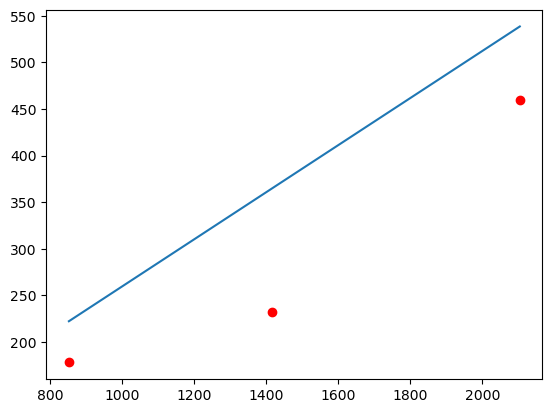

In [144]:
plt.plot(x_train[:,0], f_wb_x)

plt.scatter(x_train[:,0], y_train, c='r')

plt.show()


# Gradient Descent With Multiple Variables

In [145]:
w_init = np.array([0,0,0])
def compute_gradient(x, y, w, b): 
    m,n = x.shape 
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

def gradient_descent(x, y, w_in, b_in, gradient_function, alpha, num_iters): 
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b

initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7
w_final, b_final = gradient_descent(x_train, y_train, initial_w, initial_b, compute_gradient, alpha, iterations)
print(f"Final Value of b: {b_final:0.2f},Final Value of w : {w_final} ")


Final Value of b: -0.00,Final Value of w : [ 0.20395692  0.00374947 -0.06587395] 


## Prediction

In [155]:
model_predictions = np.zeros(m)
for i in range(m):
    target_value=y_train[i]
    model_predictions[i]=np.dot(x_train[i],w_final)+b_final 
#     print(f'Target Value:{target_value},Model Predicted Value:{model_predictions}')

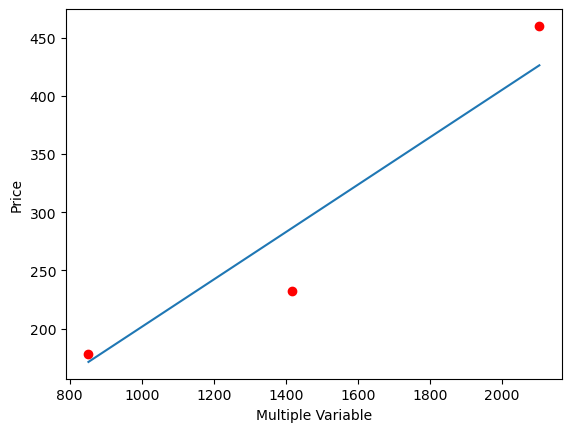

In [156]:
#Plot
plt.plot(x_train[:,0], model_predictions)
plt.xlabel('Multiple Variable')
plt.ylabel("Price")
plt.scatter(x_train[:,0], y_train, c='r')